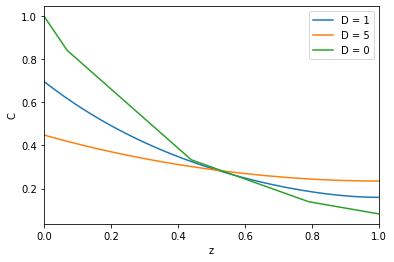

In [18]:
# import the solve_bvp package
from scipy.integrate import solve_bvp
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# define the plug-flow reactor model with axial dispersion
# note that this time, we have to use numpy arrays instead of lists
def pfr_disp(z, C): 
    u = 4.
    k = 10.    
    return np.vstack((C[1], u*C[1]/D + k*C[0]/D))

# define the function that calculates the residuals of the boundary conditions
def pfr_bc(Ca, Cb):
    u = 4.
    C0 = 1.
    return np.array([C0 - Ca[0] + D/u * Ca[1], Cb[1]])

# let's calculate the value of the function at ten point between 0 and 1
x = np.linspace(0, 1, 100)

# we need to define the initial values for the whole domain
C_init = np.zeros((2, x.size))

# now the model can be solved
D = 1.
res = solve_bvp(pfr_disp, pfr_bc, x, C_init)

# for comparison, let's also solve this problem with a different value for the axial dispersion coefficient.
D = 5.
res_2 = solve_bvp(pfr_disp, pfr_bc, x, C_init)

# and finally for comparison, let's solve as plug-flow reactor (D = 0)
def pfr_plug(z, C):
    u = 4.
    k = 10.
    return -k * C / u

res_comp = solve_ivp(pfr_plug, (0., 1.), [1.])

plt.plot(res.x, res.y[0,:])
plt.plot(res_2.x, res_2.y[0,:])
plt.plot(res_comp.t, res_comp.y[0,:])
plt.xlim((0., 1.0))
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["D = 1", "D = 5", "D = 0"])
plt.show()